In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

true_df = pd.read_csv("/content/drive/MyDrive/news/label/True.csv")
fake_df = pd.read_csv("/content/drive/MyDrive/news/label/Fake.csv")
true_df["label"] = 1
fake_df["label"] = 0

In [3]:
df = pd.concat([true_df, fake_df], axis=0)
df = df[["text", "label"]]

print("Dataset Loaded")
print(df.head())


Dataset Loaded
                                                text  label
0  WASHINGTON (Reuters) - The head of a conservat...      1
1  WASHINGTON (Reuters) - Transgender people will...      1
2  WASHINGTON (Reuters) - The special counsel inv...      1
3  WASHINGTON (Reuters) - Trump campaign adviser ...      1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      1


In [4]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  #
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower().strip()
    return text

df["text"] = df["text"].apply(clean_text)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.25, random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

lr = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
ensemble_model = VotingClassifier(
    estimators=[('lr', lr), ('nb', nb), ('rf', rf)],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = ensemble_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9864587973273942

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5829
           1       0.98      0.99      0.99      5396

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



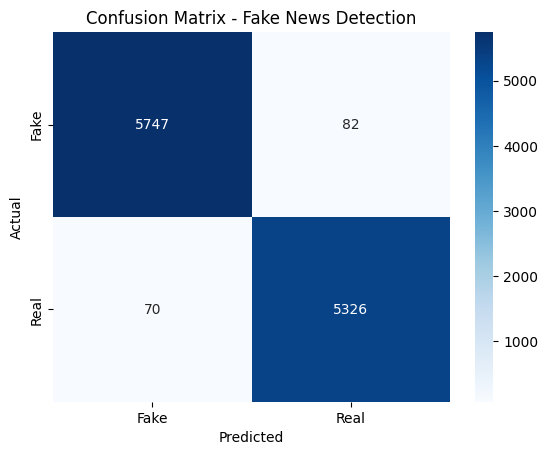

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fake News Detection")
plt.show()


In [13]:
def predict_news(news_text):
    vec = vectorizer.transform([news_text])
    pred = ensemble_model.predict(vec)[0]
    return "Real News" if pred == 1 else "Fake News"
user_text = input("📰 Enter a news headline: ")
print("")
print("MESSAGE📢:",predict_news(user_text))


📰 Enter a news headline: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ sp